In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
def apply_convolution(image_array, kernel):
    image_array = np.pad(
        image_array,
        (
            (kernel.shape[0] // 2, kernel.shape[0] // 2),
            (kernel.shape[1] // 2, kernel.shape[1] // 2),
        ),
        mode="constant",
        constant_values=0,
    )

    image_height, image_width = image_array.shape
    kernel_height, kernel_width = kernel.shape

    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    output_image = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            output_image[i, j] = np.sum(
                image_array[i : i + kernel_height, j : j + kernel_width] * kernel
            )

    return output_image

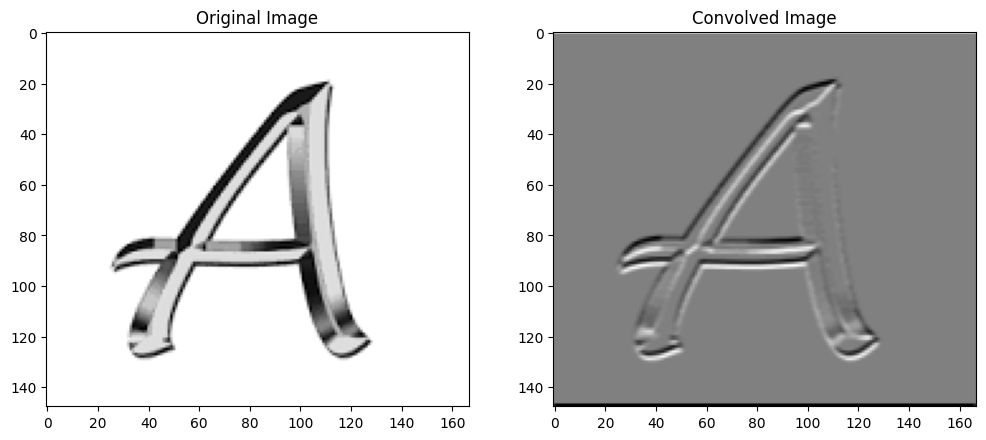

In [6]:

# Load the image and convert to grayscale
image = Image.open('download.png').convert('L')
image_array = np.array(image)

# Define a simple edge-detection kernel (Sobel filter)
kernel = np.array([
    [-1, -2, -1],
    [0,  0,  0],
    [1,  2,  1]
])

# Apply the convolution
convolved_image = apply_convolution(image_array, kernel)

# Plot the original and convolved images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_array, cmap='grey')

plt.subplot(1, 2, 2)
plt.title('Convolved Image')
plt.imshow(convolved_image, cmap='grey')
plt.show()
